In [48]:
import numpy as np
import numpy.random as nr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import *
%matplotlib inline



In [49]:
aw_data = pd.read_csv('AdvWorksCusts.csv')
bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
Monthspend = pd.read_csv('AW_AveMonthSpend.csv')
aw_test = pd.read_csv('AW_test.csv')

In [50]:
aw_data['AveMonthSpend'] = Monthspend['AveMonthSpend']

In [51]:
aw_data['BikeBuyer'] = bikebuyer['BikeBuyer']
aw_data

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,New South Wales,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


In [52]:
#Checking for duplicates

print(aw_data.shape)
print(aw_data['CustomerID'].unique().shape)

(16519, 25)
(16404,)


In [53]:
#There are duplicate columns
aw_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
aw_test.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
aw_data

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,New South Wales,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


In [54]:
#Now we check for null data

aw_data.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

In [55]:
aw_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
aw_test.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)

In [56]:
aw_data

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,Latasha,Jimenez,7259 Birchwood,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,1965-03-22,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,James,Ptaszynski,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,1936-04-02,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,Julian,Griffin,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,636-555-0197,1940-01-01,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,Marvin,Hernandez,1019 Book Road,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,1946-10-20,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


In [57]:
aw_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [58]:
print(aw_data.columns)
aw_data.head(5)

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


In [59]:
#We will notice the distribution in categorical columns and decide which ones to aggregate

cat_columns = ['City', 'StateProvinceName', 'CountryRegionName','Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 
               'NumberChildrenAtHome', 'TotalChildren']
for col in cat_columns:
    print()
    print('For column ' + col)
    print(aw_data[col].value_counts())


For column City
London            379
Paris             341
Beaverton         190
Burien            188
Chula Vista       185
                 ... 
Clay                1
Chantilly           1
Central Valley      1
Carol Stream        1
Clarkston           1
Name: City, Length: 267, dtype: int64

For column StateProvinceName
California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
V

In [60]:
# we will not include the columns: city, StateProvinceName because there are as low as 1 case for certain data

#Now we look at BikeBuyer and we get to notice that fewer customer have bought bikes then thos who havent


print(aw_data['BikeBuyer'].value_counts())

0    10949
1     5455
Name: BikeBuyer, dtype: int64


In [61]:
#we will drop columns like phone number that are of no use

aw_data.drop(['City', 'StateProvinceName', 'PostalCode', 'PhoneNumber', 'HomeOwnerFlag'], axis = 1, inplace = True)
aw_test.drop(['City', 'StateProvinceName', 'PostalCode', 'PhoneNumber', 'HomeOwnerFlag'], axis = 1, inplace = True)
aw_data.shape

(16404, 16)

In [62]:
aw_data.reset_index(inplace = True)
aw_test.reset_index(inplace = True)
aw_data.head(40)

,index,CustomerID,FirstName,LastName,AddressLine1,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,0,11000,Jon,Yang,3761 N. 14th St,Australia,1966-04-08,Bachelors,Professional,M,M,0,0,2,137947,89,0
1,1,11001,Eugene,Huang,2243 W St.,Australia,1965-05-14,Bachelors,Professional,M,S,1,3,3,101141,117,1
2,2,11002,Ruben,Torres,5844 Linden Land,Australia,1965-08-12,Bachelors,Professional,M,M,1,3,3,91945,123,0
3,3,11003,Christy,Zhu,1825 Village Pl.,Australia,1968-02-15,Bachelors,Professional,F,S,1,0,0,86688,50,0
4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Australia,1968-08-08,Bachelors,Professional,F,S,4,5,5,92771,95,1
5,5,11005,Julio,Ruiz,7305 Humphrey Drive,Australia,1965-08-05,Bachelors,Professional,M,S,1,0,0,103199,78,1
6,6,11006,Janet,Alvarez,2612 Berry Dr,Australia,1965-12-06,Bachelors,Professional,F,S,1,0,0,84756,54,1
7,7,11007,Marco,Mehta,942 Brook Street,Australia,1964-05-09,Bachelors,Professional,M,M,2,3,3,109759,130,1
8,8,11008,Rob,Verhoff,624 Peabody Road,Australia,1964-07-07,Bachelors,Professional,F,S,3,4,4,88005,85,1
9,9,11009,Shannon,Carlson,3839 Northgate Road,Australia,1964-04-01,Bachelors,Professional,M,S,1,0,0,106399,74,0


In [63]:
from datetime import date
ages = []
today = date.today()
for i in range(aw_data.shape[0]):
    year, month, day = aw_data['BirthDate'][i].split('-')
    birthdate = date(int(year), int(month), int(day))
    age = ((today - birthdate).days) // 365
    ages.append(age)

aw_data['Age'] = ages
aw_data.drop(['BirthDate', 'index','AddressLine1','FirstName', 'LastName'], axis = 1,inplace = True)

#we can drop addressline1, firstname, lastname as it is not useful


In [64]:
ages = []
today = date.today()
for i in range(aw_test.shape[0]):
    month, day, year = aw_test['BirthDate'][i].split('/')
    birthdate = date(int(year), int(month), int(day))
    age = ((today - birthdate).days) // 365
    ages.append(age)

aw_test['Age'] = ages
aw_test.drop(['BirthDate', 'index','AddressLine1','FirstName', 'LastName'], axis = 1,inplace = True)


In [65]:
cat_columns = ['CountryRegionName','Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 
               'NumberChildrenAtHome', 'TotalChildren']
num_cols = ['YearlyIncome', 'Age']


In [66]:
"""
We will investigate plots between
bar for categorical columns
scatter(With AveMonthSpend) and histogram along with kde for numerical 

""";

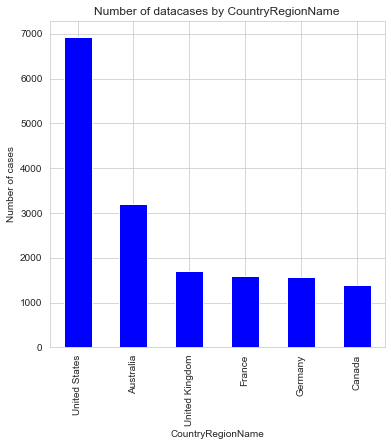

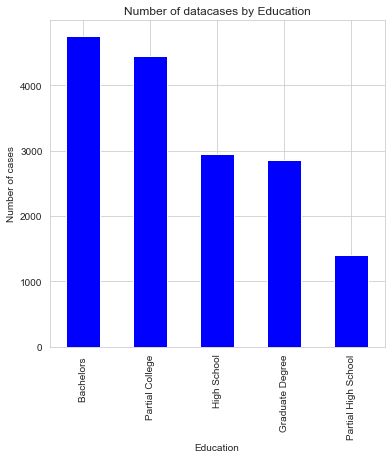

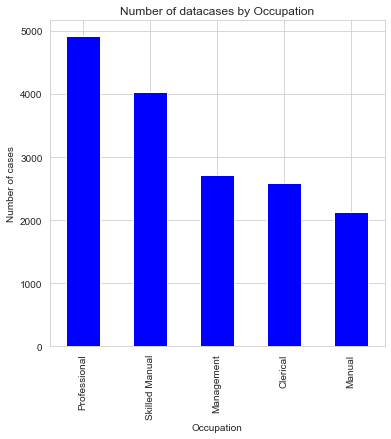

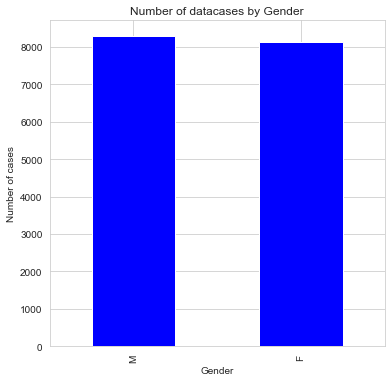

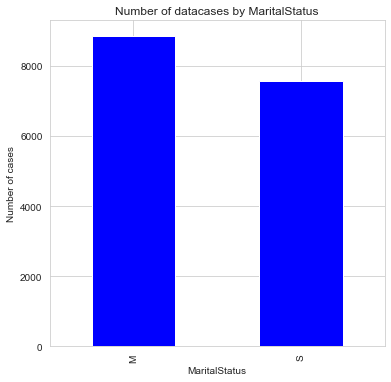

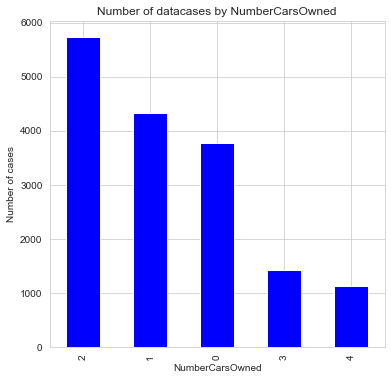

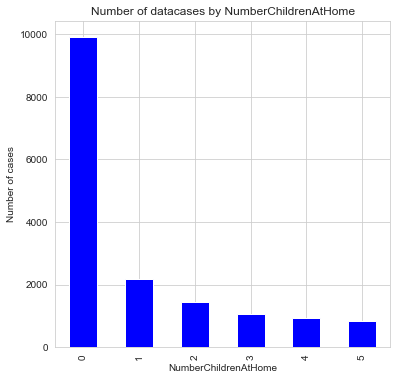

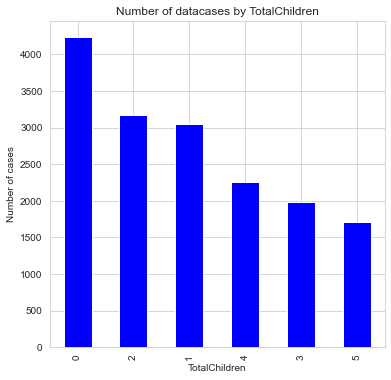

In [67]:
def plot_bars(aw_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = aw_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of datacases by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of cases')# Set text for y axis
        plt.show()
        
plot_bars(aw_data, cat_columns)


C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


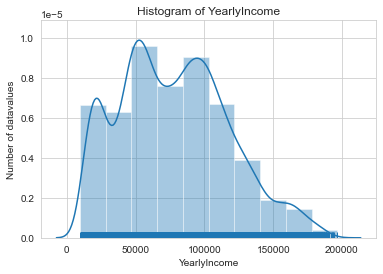

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


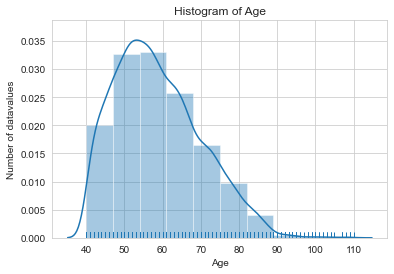

In [68]:
#hist
def plot_density_hist(auto_prices, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of datavalues')# Set text for y axis
        plt.show()
        
plot_density_hist(aw_data, num_cols)

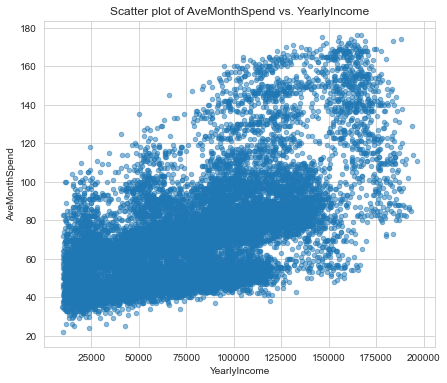

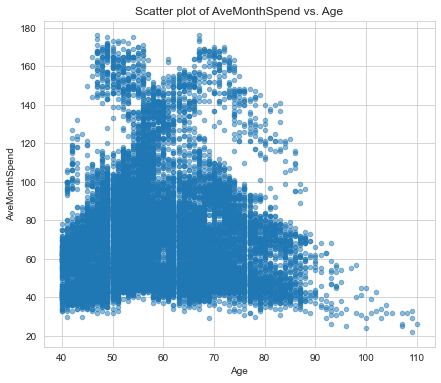

In [69]:
#Scatter plots

def plot_scatter(aw_data, cols, col_y = 'AveMonthSpend', alpha = 0.5):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        aw_data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter(aw_data, num_cols)

In [70]:
"""
Now we drow box, violin and multidimensional scatter plots to 
check for the relationship between AveMonthSpend and cat

"""

'\nNow we drow box, violin and multidimensional scatter plots to \ncheck for the relationship between AveMonthSpend and cat\n\n'

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


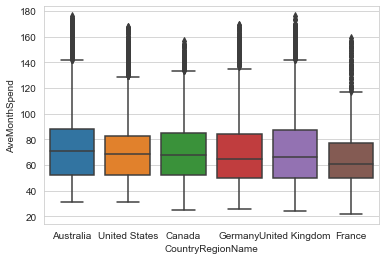

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


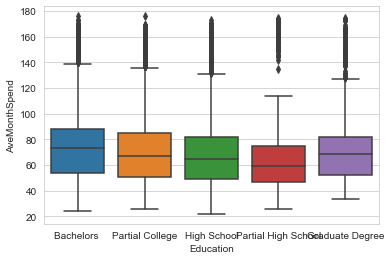

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


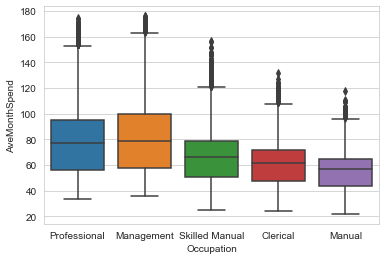

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


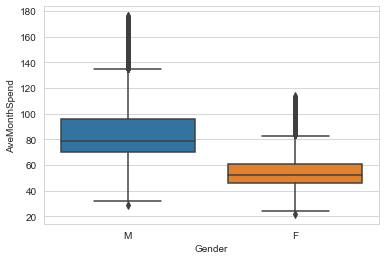

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


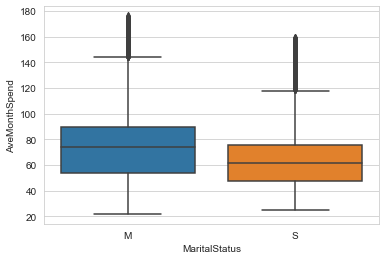

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


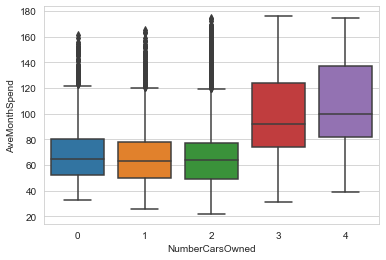

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


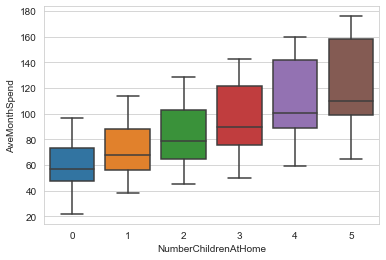

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


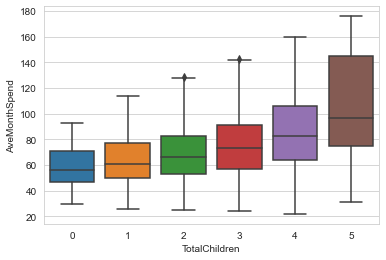

In [71]:
def plot_box(aw_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=aw_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(aw_data, cat_columns)

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


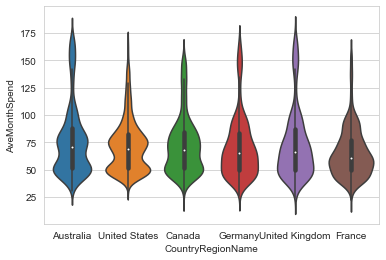

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


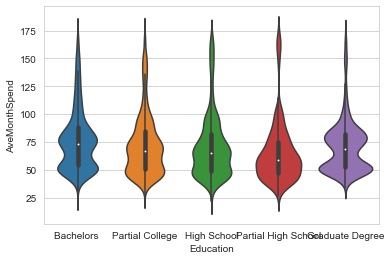

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


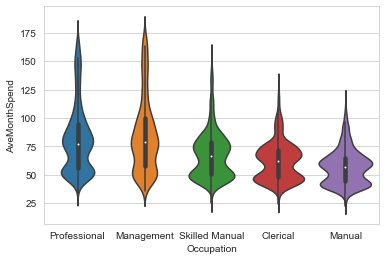

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


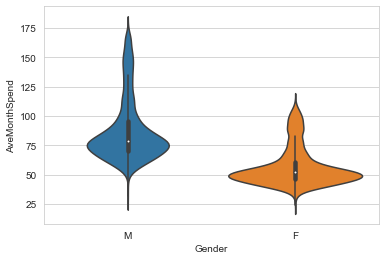

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


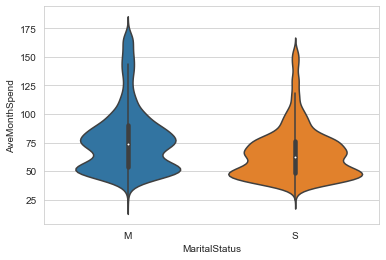

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


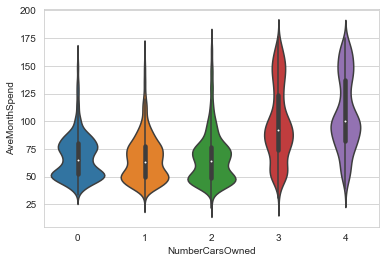

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


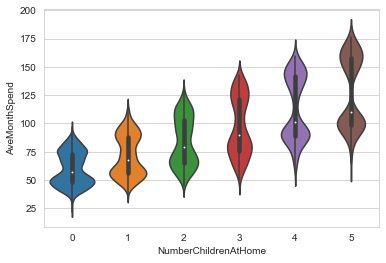

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


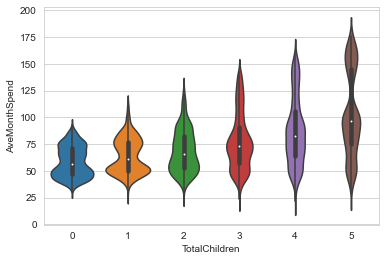

In [72]:
def plot_violin(aw_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=aw_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(aw_data, cat_columns)

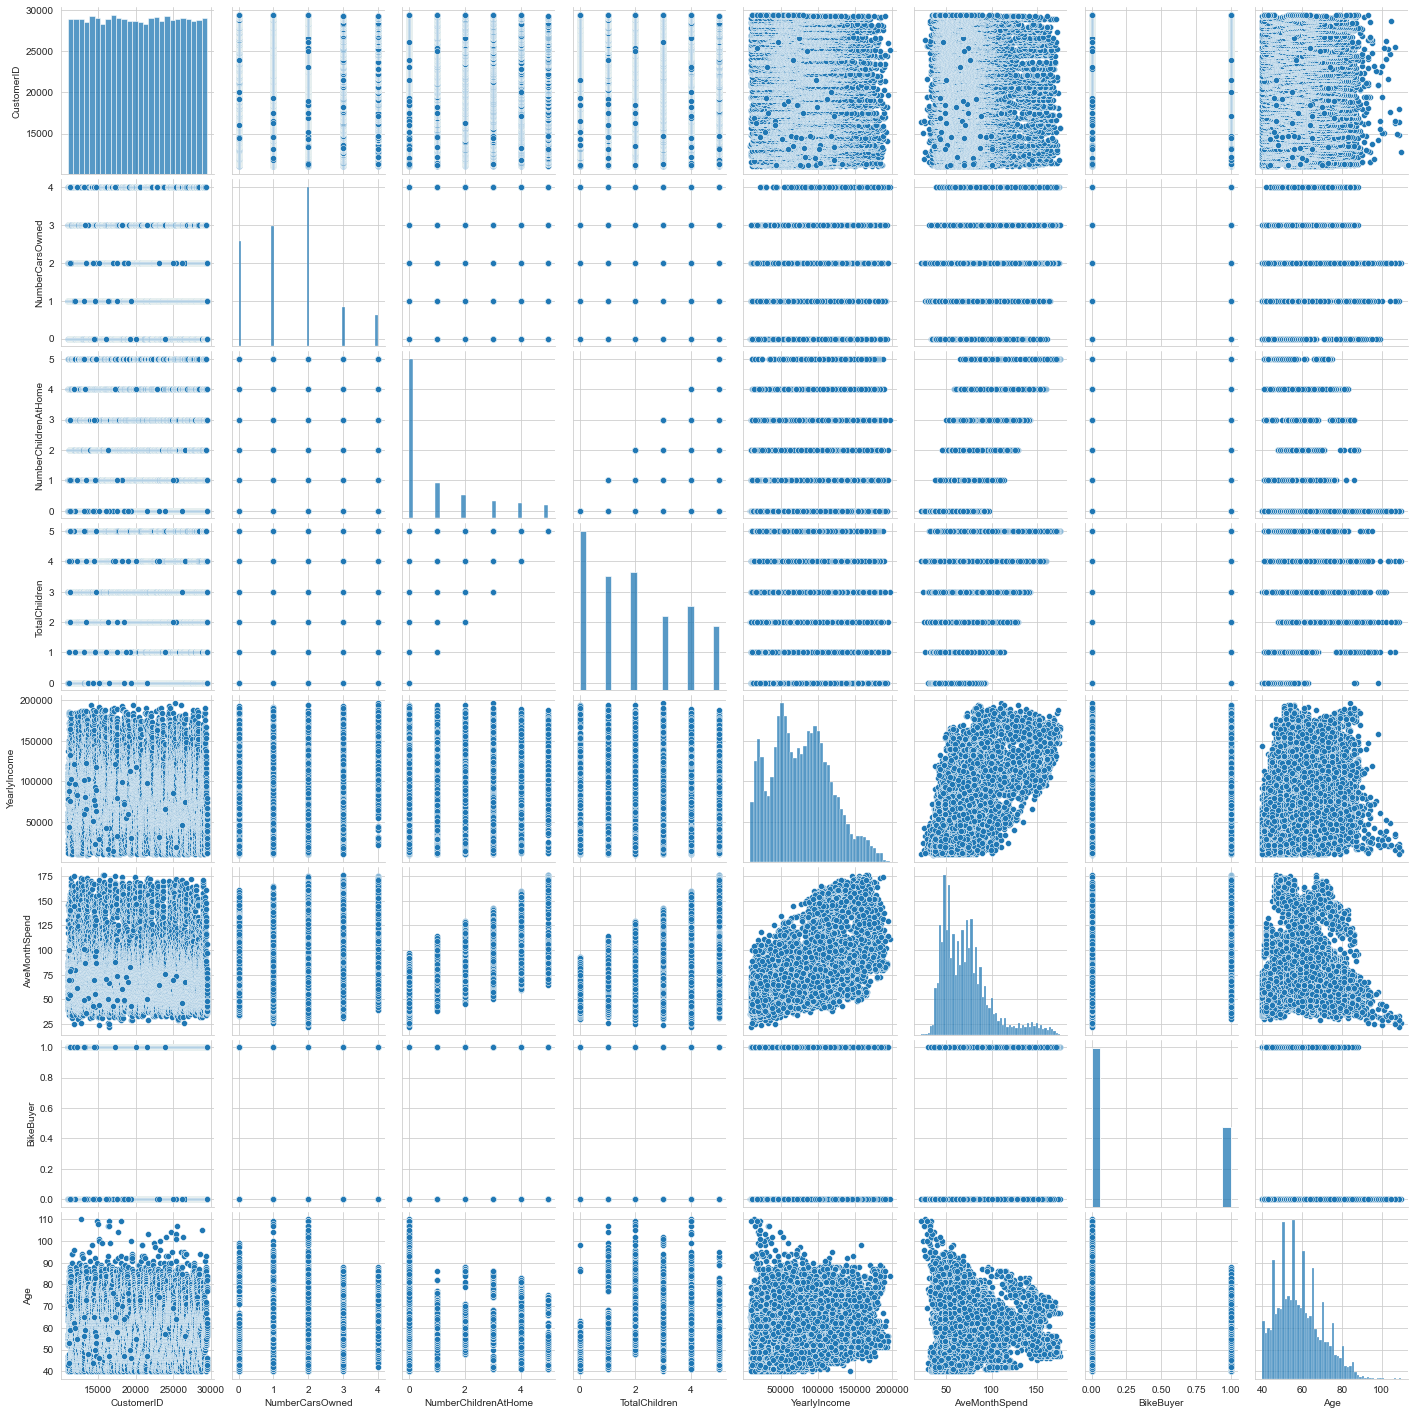

In [73]:
sns.pairplot(aw_data)

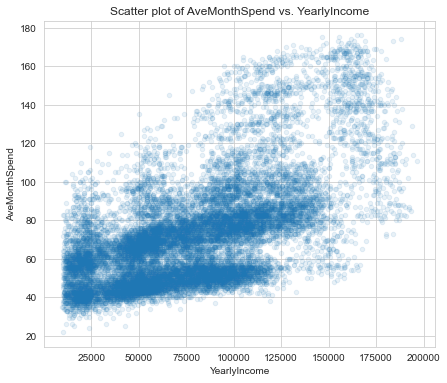

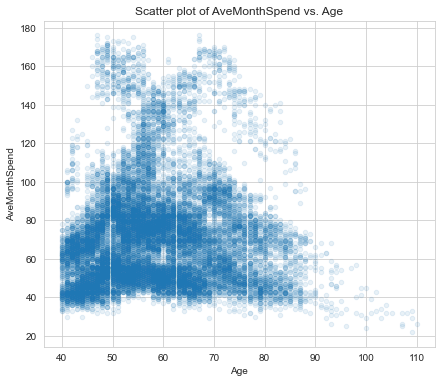

In [74]:
def plot_scatter(data, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        data.plot.scatter(x = col, y = col_y, ax = ax , alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
plot_scatter(aw_data, num_cols , alpha = 0.1)

In [75]:
aw_data.to_csv('AW_data_prepad.csv', index = False, header = True)

# Linear Regression 

We are going to be using linear regression and apply gradient descent algorithm to predict Average monthly spend and then compare it with that of a predefined model

In [76]:
import scipy.stats as ss
from sklearn import preprocessing
from sklearn import linear_model as lm
import sklearn .model_selection as ms
import sklearn.metrics as sklm

In [77]:
aw_data = pd.read_csv('AW_data_PrePad.csv')
aw_data.columns

Index(['CustomerID', 'CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

In [78]:
cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 
               'NumberChildrenAtHome', 'TotalChildren']
num_cols = ['YearlyIncome', 'Age']


In [79]:
def encode_string(col):
    enc = preprocessing.LabelEncoder()
    enc.fit(col)
    enc_col = enc.transform(col)
    
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_col.reshape(-1,1))
    return encoded.transform(enc_col.reshape(-1,1)).toarray()

Features = encode_string(aw_data['CountryRegionName'])

for col in cat_cols:
    temp = encode_string(aw_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 37)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [80]:
Features = np.concatenate([Features, np.array(aw_data[['YearlyIncome', 'Age']])], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 39)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05 5.50000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.01141e+05 5.50000e+01]]


In [81]:
nr.seed(9988)
labels = np.array(aw_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 8000)
x_train = Features[indx[0], :]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1], :]
y_test = np.ravel(labels[indx[1]])

In [82]:
def scale(columns):
    for i in range(columns.shape[1]):
        col = columns[:, i]
        m = col.mean()
        s = col.std()
        for j in range(col.shape[0]):
            columns[j, i] = (columns[j, i]-m)/s
            
scale(x_train[:, 37:])
scale(x_test[:, 37:])
x_train[:, 37:]

array([[ 0.42837076,  0.46825336],
       [ 0.04543828,  1.0910948 ],
       [ 0.33813679, -0.06561074],
       ...,
       [-0.09240024,  0.02336661],
       [ 1.14019131,  1.18007214],
       [-0.74209496, -0.33254278]])

In [83]:
#now we compare this with the predesigned linear regression model

# define and fit the linear regression model
lin_mod = lm.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-1.10803093e+13 -1.10803093e+13 -1.10803093e+13 -1.10803093e+13
 -1.10803093e+13 -1.10803093e+13  1.84103990e+13  1.84103990e+13
  1.84103990e+13  1.84103990e+13  1.84103990e+13  1.96400848e+13
  1.96400848e+13  1.96400848e+13  1.96400848e+13  1.96400848e+13
 -2.15531267e+13 -2.15531267e+13 -1.47690521e+13 -1.47690521e+13
  7.42734165e+12  7.42734165e+12  7.42734165e+12  7.42734165e+12
  7.42734165e+12  6.23516515e+12  6.23516515e+12  6.23516515e+12
  6.23516515e+12  6.23516515e+12  6.23516515e+12 -4.31050242e+12
 -4.31050242e+12 -4.31050242e+12 -4.31050242e+12 -4.31050242e+12
 -4.31050242e+12  8.43164062e+00 -1.59716797e+00]


In [84]:
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 38.804468081830194
Root Mean Square Error = 6.229323244288275
Mean Absolute Error    = 4.750440240097646
Median Absolute Error  = 3.7724609375
R^2                    = 0.9480649995150456
Adjusted R^2           = 0.9478891032514865


In [85]:
print(y_score)
print(y_test)

[87.98046875 53.86816406 47.26171875 ... 30.46875    86.98535156
 74.6953125 ]
[88 47 47 ... 39 84 75]


# Evaluating the test case given to us before to see if our model is correct

In [86]:
aw_test

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,United States,Bachelors,Management,F,S,2,0,5,86931,76
1,29135,Canada,Bachelors,Skilled Manual,M,M,2,2,4,100125,56
2,12156,United States,Graduate Degree,Management,F,M,2,0,4,103985,87
3,13749,United States,Graduate Degree,Skilled Manual,M,M,0,0,4,127161,62
4,27780,France,High School,Manual,F,M,1,2,2,21876,56
...,...,...,...,...,...,...,...,...,...,...,...
495,24211,United Kingdom,Graduate Degree,Skilled Manual,F,S,0,0,0,97084,52
496,23627,Germany,Partial College,Management,F,S,4,4,4,110762,71
497,14500,United States,Bachelors,Management,F,S,4,3,3,138097,83
498,22223,United States,Partial College,Professional,F,M,1,0,2,101465,64


In [87]:
Features_test = encode_string(aw_test['CountryRegionName'])

for col in cat_cols:
    temp = encode_string(aw_test[col])
    Features_test = np.concatenate([Features_test, temp], axis = 1)
    
print(Features_test.shape)
print(Features_test[:2, :])

(500, 37)
[[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
